In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Inference of Parameters in Parametric Models

In this lab, we will look at estimating parameters based on observation of data points and deepen our understanding of error estimates.

## Estimating the parameters of Gaussian Data

We will generate $n$ data points, which are i.i.d. realizations of a random variable $X$ that follows a normal distribution, i.e. $X\sim\mathcal{N}(\mu, \sigma^2)$.


$$p(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{ - \frac{(x - \mu)^2}{2\sigma^2} }$$


### Data generation

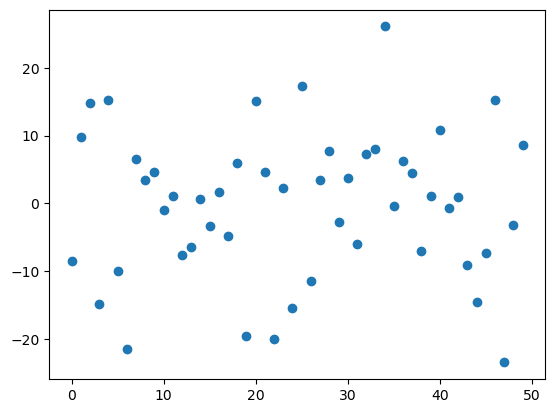

In [2]:
mu = 1  # Mean of the distribution
sigma = 10  # Standard deviation of the distribution


num_samples = 50  # Number of data points to generate

# Generate synthetic data points
data = np.random.normal(loc=mu, scale=sigma, size=num_samples)

#Visualization of the datapoints
plt.plot(data,'o')
plt.show()

In the previous lesson, we examined the point estimators $\hat\mu$ and $\hat\sigma^2$, which stand for $\mu$ and $\sigma^2$, respectively. The expressions for these estimators are given by:
$$\hat\mu = \bar X$$
and
$$\hat\sigma^2 = S^2 = \frac{1}{n-1}\sum_{i=1}^n (X_i - \bar X)^2$$
Both of these estimators are unbiased and consistent.


We also obtained that the Maximum Likelihood Estimation (MLE) estimator for $\sigma^2$ was
$$\hat \sigma_\mathrm{MLE}=\frac{1}{n}\sum_{i=1}^n (X_i-\bar X)^2$$
which, on the contrary to $\hat\sigma$ is biased, but it is better with respect to the MSE criterion.

**Exercise:** Let us now construct a function that uses these formulas to estimate $\hat\mu$, $\hat\sigma^2$ and $\hat \sigma_\mathrm{MLE}$ using a vector of data points.

In [3]:
def gaussian_parameters(data):
    n=len(data)
    data = np.array(data)
    
    hmu = np.mean(data)
    hsigma2 = np.sum((data-hmu)**2)/(n-1)
    hsigma2_mle = np.sum((data-hmu)**2)/n
    
    return hmu, hsigma2,hsigma2_mle 

hmu, hsigma2, hsigma2_mle = gaussian_parameters(data)

print("Estimation of mu: {:.4f}".format(hmu),"True {:.4f}".format(mu))
print("Estimation of sigma^2: {:.4f}".format(hsigma2),"True {:.4f}".format(sigma**2))
print("MLE estimation of sigma^2: {:.4f}".format(hsigma2_mle),"True {:.4f}".format(sigma**2))


Estimation of mu: -0.2245 True 1.0000
Estimation of sigma^2: 116.7475 True 100.0000
MLE estimation of sigma^2: 114.4125 True 100.0000


**Exercise:** Visualize the data in a histogram and compare it with the true and inferred distribution. Rerun the experiment several times to see how it changes.

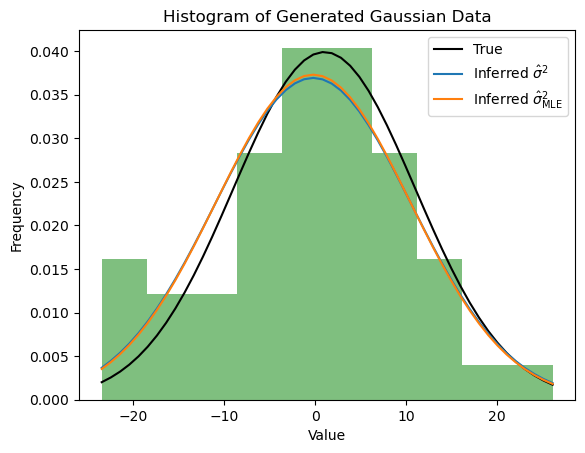

In [4]:
def gauss(x,mu,sigma2):
    return 1./np.sqrt(2*np.pi*sigma2)*np.exp(-(x-mu)**2/(2*sigma2))

# Visualizing the generated data using a histogram
plt.hist(data, bins=10, align='mid', density=True, alpha=0.5, color='g')

# Add a title
plt.title('Histogram of Generated Gaussian Data')

x=np.linspace(np.min(data),np.max(data))
plt.plot(x,gauss(x, mu, sigma**2),color='black',label='True')
plt.plot(x,gauss(x, hmu, hsigma2),label=r'Inferred $\hat\sigma^2$')
plt.plot(x,gauss(x, hmu, hsigma2_mle),label=r'Inferred $\hat\sigma^2_\mathrm{MLE}$')

plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show plot
plt.show()


If now you rerun the experiment (you generate a new dataset) and recompute the estimators, you will obtain different values for all three estimators. The estimators are random variables themselves. The important question is being able to quantify the degree of error to the estimates obtained.

###  Investigating the sampling distribution

**Exercise:** Admitting that $\text{Var}(S^2)=2\sigma^4/(n-1)$, compute the Bias and the MSE for both estimators $\hat\sigma^2$ and $\hat\sigma^2_{\text{MLE}}$, as a function of $n$. Which of the two estimators for $\sigma^2$ has smaller MSE?




# Here you can write your calculations, for that, transform the cell to Markdown

$\text{Bias}(\hat{\mu})=0$

$\text{Bias}(\hat{\sigma}^2)=\text{E}[\hat{\sigma}^2]-\sigma^2=\sigma^2-\sigma^2=0$

$\text{Bias}({\hat{\sigma}}_{\text{MLE}}^2)=\text{E}[{\hat{\sigma}}_{\text{MLE}}^2]-\sigma^2=\frac{n-1}{n}\sigma^2-\sigma^2=(\frac{n-1}{n}-1)\sigma^2=-\frac{\sigma^2}{n}$

$\text{MSE}(\hat{\mu})=\frac{\sigma^2}{n}$

$\text{MSE}(\hat{\sigma}^2)=\text{E}[(\hat{\sigma}^2-\sigma^2)^2]=\text{Bias}[\hat{\sigma}^2]+\text{Var}(\hat{\sigma}^2)=0+\frac{2\sigma^4}{n-1}=\frac{2\sigma^4}{n-1}$


$\text{MSE}(\hat{\sigma}_{\text{MLE}}^2)=\text{E}[(\hat{\sigma}_{\text{MLE}}^2-\sigma^2)^2]=\text{Bias}(\hat{\sigma}_{\text{MLE}}^2)+\text{Var}(\sigma^2)=\frac{2n-1}{n^2}\sigma^4.$

**Exercise 3: Sampling distribution:** Which is the expected sampling distribution for the three estimators?

For this goal, recall that we are dealing with multiple independent realizations of a random variable $X\sim \mathcal{N}(\mu,\sigma^2)$. 

In this context, you can use first the fact that the sum of two randomly distributed random variables $X$ and $Y$ is also Gaussianly distributed and
$$X\sim \mathcal{N}\left(\mu_X,\sigma_X^2\right)$$
$$Y\sim \mathcal{N}\left(\mu_Y,\sigma_Y^2\right)$$
then
$$Z=X+Y\sim \mathcal{N}\left(\mu_X+\mu_Y,\sigma_X^2+\sigma_Y^2\right)$$
and use it to obtain the distribution of $\bar X$

For the variance estimates, you should use the Cochran's theorem. If $Z_1,\ldots, Z_n$ are independent i.i.d., standard normal random variables, i.e. $Z_i\sim \mathcal{N}\left(0,1\right)$, then
$$Z=\sum_{i=1}^n \left( Z_i-\bar X\right)^2 \sim \chi^2 (n-1)$$
with $\chi^2(n-1)$ being the $\chi^2$ function with $n-1$ degrees of freedom.

# Here you can write your calculations, for that, transform the cell to Markdown

$\bar{X}\sim \mathcal{N}\left(\mu,\frac{\sigma^2}{n}\right) $

$\frac{(n-1)S^2}{\sigma^2}\sim \chi^2(n-1)$

$\frac{n\hat{\sigma}_{\text{MLE}}^2}{\sigma^2}\sim\chi^2(n-1)$

**Exercise: Empirically estimate of the sampling distribution** Repeat the experiment $N=10^4$ times and save the value of the estimators obtained in each trial in a vector. Repeat this using different dataset sizes $n=10,100,1000,10^4$.

In [5]:
N=10000

list_num_samples=np.array([10,100,1000,10000])

xmu,xs2,xs2_mle=np.zeros((3,len(list_num_samples),N))

for i,n in enumerate(list_num_samples):
    for t in range(N):
        data = np.random.normal(loc=mu, scale=sigma, size=n)
        #计算参数calculate the parameters
        mmu,ssigma2,ssigma_mle=gaussian_parameters(data)

        xmu[i,t]=mmu
        xs2[i,t]=ssigma2
        xs2_mle[i,t]= ssigma_mle

**Exercise:** Compare empirical estimation of the bias and MSE as a function of $n$ with the
with the theoretical ones obtained above

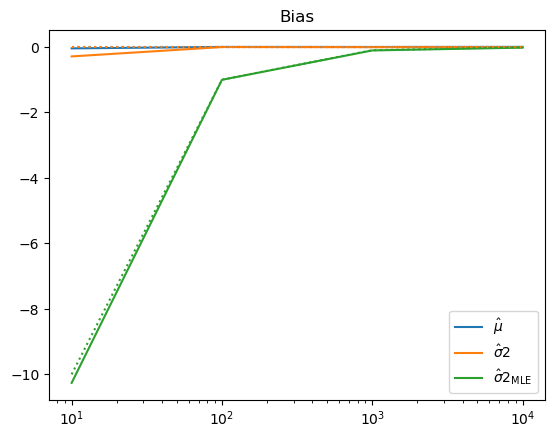

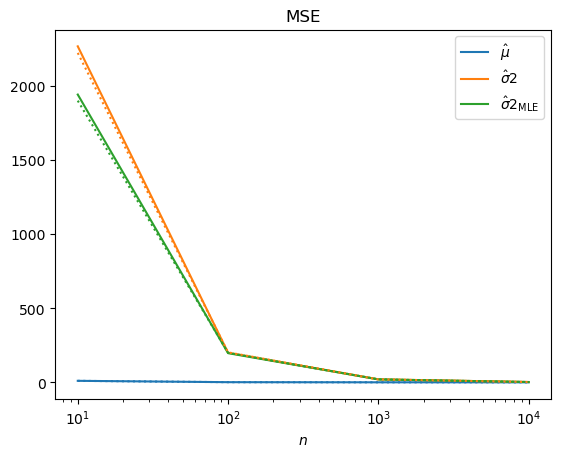

In [6]:
bias_mu,bias_sigma2,bias_sigma2_mle=np.zeros((3,len(list_num_samples)))
mse_mu,mse_sigma2,mse_sigma2_mle=np.zeros((3,len(list_num_samples)))

for i,n in enumerate(list_num_samples):
    
    bias_mu[i]=np.average(xmu[i])-mu
    bias_sigma2[i]=np.average(xs2[i])-sigma**2
    bias_sigma2_mle[i]=np.average(xs2_mle[i])-sigma**2
    
    mse_mu[i]=np.average((xmu[i]-mu)**2)
    mse_sigma2[i]=np.average((xs2[i]-sigma**2)**2)
    mse_sigma2_mle[i]=np.average((xs2_mle[i]-sigma**2)**2)
    
    
plt.title('Bias')
plt.plot(list_num_samples,bias_mu,color='C0',label=r'$\hat\mu$')
plt.plot(list_num_samples,bias_sigma2,color='C1',label=r'$\hat\sigma2$')
plt.plot(list_num_samples,bias_sigma2_mle,color='C2',label=r'$\hat\sigma2_\mathrm{MLE}$')


plt.plot(list_num_samples,np.zeros_like(list_num_samples),':',color='C0')
plt.plot(list_num_samples,np.zeros_like(list_num_samples),':',color='C1')
plt.plot(list_num_samples,-sigma**2/np.array(list_num_samples),':',color='C2')


plt.xscale('log')

plt.legend()
plt.show()


plt.title('MSE')
plt.plot(list_num_samples,mse_mu,label=r'$\hat\mu$',color='C0')
plt.plot(list_num_samples,mse_sigma2,label=r'$\hat\sigma2$',color='C1')
plt.plot(list_num_samples,mse_sigma2_mle,label=r'$\hat\sigma2_\mathrm{MLE}$',color='C2')
plt.xlabel(r'$n$')

ns=np.array(list_num_samples)

plt.plot(ns,sigma**2/ns,':',color='C0')

plt.plot(ns,2*sigma**4/(ns-1),':',color='C1')

plt.plot(ns,sigma**4*(2*ns-1)/(ns**2),':',color='C2')


plt.xlabel(r'$n$')
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.show()

**Exercise:** Compare the density histograms of the estimators obtained for each value of $n$.

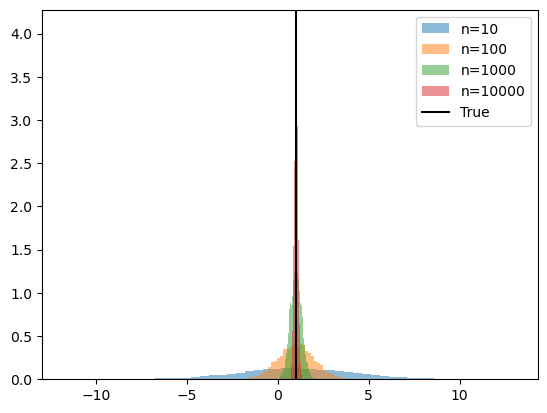

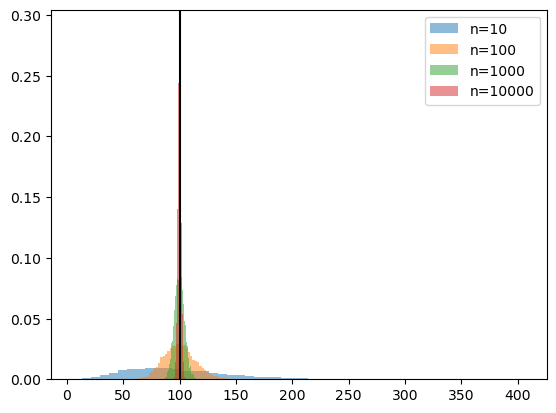

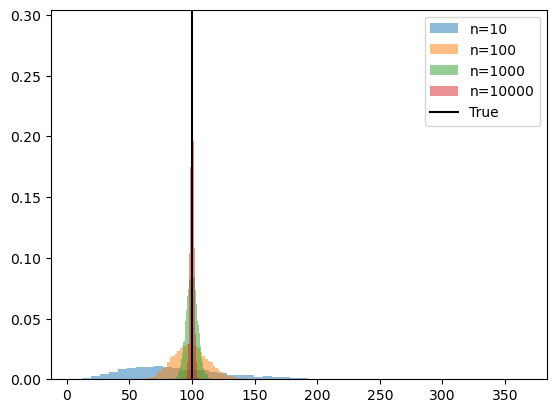

In [7]:


for i,n in enumerate(list_num_samples):
    plt.hist(xmu[i],bins=50,alpha=0.5,color='C'+str(i),label='n='+str(n),density=True)
    x=np.array(xmu[i])
    
plt.axvline(x=mu,color='black',label='True')
plt.legend()
plt.show()

for i,n in enumerate(list_num_samples):
    plt.hist(xs2[i],bins=50,alpha=0.5,color='C'+str(i),label='n='+str(n),density=True)
plt.legend()
plt.axvline(x=sigma**2,color='black',label='True')
plt.show()

for i,n in enumerate(list_num_samples):
    plt.hist(xs2_mle[i],bins=50,alpha=0.5,color='C'+str(i),label='n='+str(n),density=True)
    
plt.axvline(x=sigma**2,color='black',label='True')
plt.legend()
plt.show()

**Exercise:** Compare the normalized histograms with the theoretical distribution expected. 
In order to compare the distribution of the variance estimators, you need to properly readjust the variables. Recall that the Cochran's theorem tells us that

$Z=\frac{(n-1)S^2}{\sigma^2}\sim \chi^2(n-1)\Rightarrow f(z)=\chi^2_{n-1}(z)$. But we are interested in the distribution of $S^2$, not $Z$. In order to change variables, mind that the measure must be conserved, i.e. $f(z)dz=g(S^2)dS^2$. 

The $\chi^2$ for $n-1$ degrees of freedom is included in the scipy.stats package, $\chi^2_{n-1}(z)=$chi2.pdf(z, n-1)



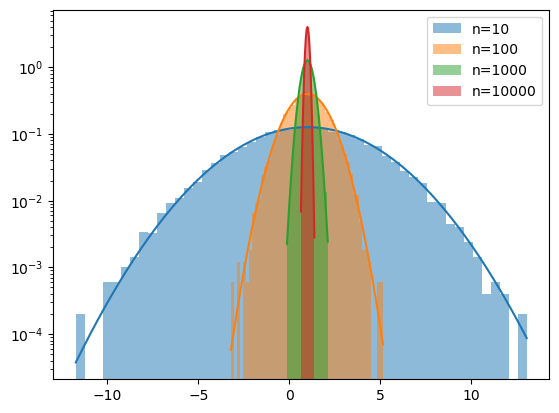

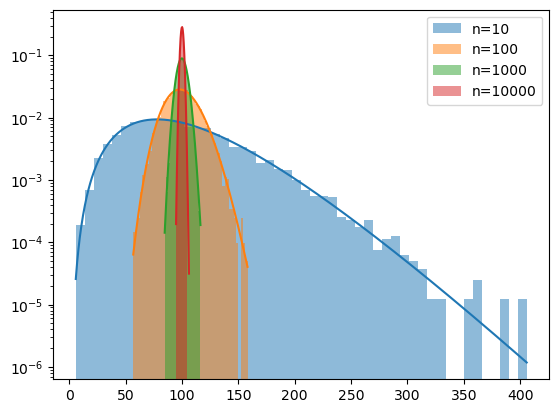

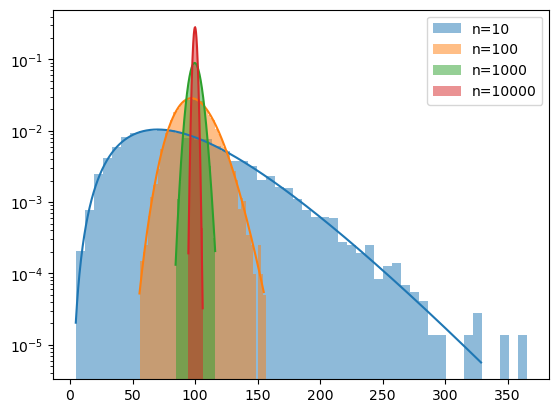

In [8]:
from scipy.stats import chi2

for i,n in enumerate(list_num_samples):
    plt.hist(xmu[i],bins=50,alpha=0.5,color='C'+str(i),label='n='+str(n),density=True)
    x=np.linspace(np.min(xmu[i]),np.max(xmu[i]),1000)
    
    plt.plot(x,gauss(x,mu,sigma**2/n),color='C'+str(i))

plt.legend()
plt.yscale('log')
plt.show()

for i,n in enumerate(list_num_samples):
    plt.hist(xs2[i],bins=50,alpha=0.5,color='C'+str(i),label='n='+str(n),density=True)
    
    y=np.array(xs2[i]*(n-1)/(sigma**2))
    x=np.linspace(np.min(y),np.max(y),1000)
    plt.plot(x*sigma**2/(n-1),chi2.pdf(x,n-1)*(n-1)/sigma**2,color='C'+str(i))

plt.legend()
plt.yscale('log')
plt.show()

for i,n in enumerate(list_num_samples):
    
    plt.hist(xs2_mle[i],bins=50,alpha=0.5,color='C'+str(i),label='n='+str(n),density=True)
    
    y=np.array(xs2_mle[i]*(n-1)/(sigma**2))
    x=np.linspace(np.min(y),np.max(y),1000)
    plt.plot(x*sigma**2/n,chi2.pdf(x,n-1)*n/sigma**2,color='C'+str(i))
    
plt.yscale('log')
plt.legend()
plt.show()

### Standard errors

The standard error of an estimator is defined as 

$$\text{SE}(\hat\theta)=\sqrt{\text{Var}(\hat\theta)}$$

In order to compute it exactly, we need to know the sampling distribution of our variable, which is normally unknown but we know it in our case.

**Exercise:** Obtain the theoretical standard error for $\hat\mu$ and $\hat\sigma$. Remain that $\text{Var}(S^2)=\frac{2\sigma^4}{n-1}$. Propose the corresponding estimated standard error.

# Here you can write your calculations, for that, transform the cell to Markdown

$\text{SE}(\hat{\mu})=\frac{\sigma}{\sqrt{n}}\Rightarrow \hat{\text{SE}}(\hat{\mu})=\frac{s}{\sqrt{n}}$

$\text{SE}(\hat{\sigma}^2)=\sigma^2\sqrt{\frac{2}{n-1}}\Rightarrow \hat{\text{SE}}(\hat{\sigma}^2)=S^2\sqrt{\frac{2}{n-1}}$

**Exercise:** Compare $\hat\mu$ and $\hat\sigma^2$ estimated for different values of $n$ with the expected error

In [15]:
n=1000

data = np.random.normal(loc=mu, scale=sigma, size=n)
hmu, hsigma2, hsigma2_mle = gaussian_parameters(data)

se_mu = sigma / np.sqrt(n)
se_sigma =sigma**2 * np.sqrt(2/(n - 1))

print("Estimation of mu: {:.4f}".format(hmu),"+-{:.4f}".format(se_mu),"True {:.4f}".format(mu))
print("Estimation of sigma^2: {:.4f}".format(hsigma2),"+-{:.4f}".format(se_sigma),"True {:.4f}".format(sigma**2))


Estimation of mu: 0.8276 +-0.3162 True 1.0000
Estimation of sigma^2: 109.0187 +-4.4744 True 100.0000


### Confidence intervals

Confidence intervals are an important tool for estimating the range in which a parameter value lies with a certain degree of confidence. Let us consider a 95% confidence interval to make it even clearer. The interpretation is that if we were to run the same experiment several times, we would expect the true parameter value to lie within this interval 95% of the time, or equivalently, with probability 0.95.

We have established the following relationships for Gaussian variables:

$$\frac{\bar{X}-\mu}{\sqrt{\sigma^2/n}}\sim \mathcal{N}(0,1)$$

$$\frac{(n-1)S^2}{\sigma^2}\sim \chi^2(n-1)$$

By merging these expressions, we derive the distribution for the t-statistic:

$$t=\frac{\bar{X}-\mu}{\hat{\text{SE}}(\bar{X})}=\frac{\bar{X}-\mu}{\frac{S}{\sqrt{n}}}\sim t(n-1),$$

Where \(t(n-1)\) means the t-Student distribution with \(n-1\) degrees of freedom.

This means that our true parameters are expressed as follows:

$$\mu=\bar{X} +\eta \frac{S}{\sqrt{n}}\quad\text{with}\quad\eta\sim t(n-1)$$

$$\sigma^2=\frac{(n-1)S^2}{\eta}\quad\text{with}\quad\eta\sim \chi^2(n-1)$$

Since the probability density functions (pdf) of these $\eta$ are known, we can use these expressions to define an interval in which the estimators will lie with $1-\alpha$ probability. To do this, we need to find the quantiles $ x_{\alpha/2} $ and $x_{1-\alpha/2} $ for each distribution.

Since the t-Student distribution is symmetric,
$$-x_{\alpha/2} = x_{1-\alpha/2} \equiv t_{1-\frac{\alpha}{2}, n-1}$$
and we will use
$$\chi_{\alpha/2}^2(n-1) \text{ and } \chi_{1-\alpha/2}^2(n-1)$$
to represent the quantiles of the $ \chi^2(n-1)$ distribution.

Thus, the confidence intervals (CI) for each estimator are:

$$CI_{1-\alpha}(\mu) = \bar{X} \pm t_{1-\alpha/2, n-1} \frac{S}{\sqrt{n}}$$
$$CI_{1-\alpha}(\sigma^2) = \left( \frac{(n-1)S^2}{\chi_{1-\alpha/2, n-1}^2}, \frac{(n-1)S^2}{\chi_{\alpha/2, n-1}^2} \right)$$

In these expressions, $ CI_{1-\alpha}(\mu)$ and $ CI_{1-\alpha}(\sigma^2)$ denote the confidence intervals for the estimators of $\mu$ and $\sigma^2$, which ensure that the true parameter with a confidence level of $ 1 - \alpha$ is included in these ranges.

**Exercise:** Obtain the 95% confidence intervals for $\mu$ and $\sigma^2$ using a set of $n$ data points. The quantiles of the $t$ and $\chi^2$ distributions we can obtain them using the scipy.stats library, and the function ppf($\alpha$, degrees of freedom) for each that returns the $\alpha$-quantiles.

In [16]:
from scipy.stats import t,chi2
# Estimating standard errors

n=100

data = np.random.normal(loc=mu, scale=sigma, size=n)
hmu, hsigma2, hsigma2_mle = gaussian_parameters(data)


# Calculating 95% confidence intervals
confidence_level = 0.5
alpha=1-confidence_level

hse_mu = np.sqrt(hsigma2/n)
df = n - 1  # degrees of freedom

quantile_t= t.ppf(1-alpha/2, df)

lower_quantile_chi=chi2.ppf(alpha/2,df)
higher_quantile_chi= chi2.ppf(1-alpha/2,df)


ci_mu = (hmu-quantile_t,hmu+quantile_t)

ci_sigma2 = ((n-1)*hsigma2/higher_quantile_chi,(n-1)*hsigma2/lower_quantile_chi)


print("{:.2f}% CI for mu: ({:.4f}, {:.4f})".format(confidence_level ,ci_mu[0], ci_mu[1]))
print("{:.2f}% CI for sigma^2: ({:.4f}, {:.4f})".format(confidence_level ,ci_sigma2[0], ci_sigma2[1]))



0.50% CI for mu: (1.4963, 2.8502)
0.50% CI for sigma^2: (77.5442, 93.9884)


**Exercise:** We can now verify that the true value of the parameters in the CI thus obtained is indeed with probability$1-\alpha$ by repeating the same experiment $N=10000$. Each time we calculate the CI and check whether it contains the true values or not. Then we calculate the frequency with which it is contained. Try different confidence levels.

In [18]:
n_mu=0
n_sigma2=0
N=1000


confidence_level = 0.75
for i in range(N):
    
    n=100
    data = np.random.normal(loc=mu, scale=sigma, size=n)
    hmu, hsigma2, hsigma2_mle = gaussian_parameters(data)

    #计算置信区间
    hse_mu=np.sqrt(hsigma2/n)
    df=n-1
    
    quantile_t= t.ppf(1-(1-confidence_level)/2, df)

    lower_quantile_chi=chi2.ppf(1-confidence_level,df)
    higher_quantile_chi= chi2.ppf(confidence_level,df)
    
    ci_mu = (hmu-quantile_t*hse_mu,hmu+quantile_t*hse_mu)

    ci_sigma2 = ((n-1)*hsigma2/higher_quantile_chi,(n-1)*hsigma2/lower_quantile_chi)
    
    if ci_mu[0]<=mu<=ci_mu[1]:
        n_mu+=1
        
    if ci_sigma2[0]<=sigma**2<=ci_sigma2[1]:
        n_sigma2+=1
        
print(r'mu is contained with a frequency {:.2f}'.format(n_mu/N))
print(r'sigma2 is contained with a frequency {:.2f}'.format(n_sigma2/N))


mu is contained with a frequency 0.77
sigma2 is contained with a frequency 0.51



## Bootstrap Method:

Bootstrap is a resampling method that allows us to approximate the sampling distribution of any estimator/statistic. It works on the principle that the empirical distribution (observed data) is the best representation we have of the true distribution of the population.

#### Detailed Steps:

1. **New Sample**:

 For observed data, we draw $n$ samples **with replacement**. This means that a single data point may be selected more than once, and some data points may not be selected at all. This redrawn data set is called the bootstrap sample. From this bootstrap sample, we compute the estimator (call it $\hat\theta^* $).

2. **Repeat**:

 We repeat the above step $B$ times, resulting in $B$ bootstrap samples. For each of these samples, we compute a different $ \hat\theta^{*(b)} $. This gives us $ B$ different estimators based on the bootstrap samples.

3. **Bootstrap sampling distribution**:

 The collection of all $ \hat\theta^{*(b)} $ values gives us an empirical representation of the sampling distribution of $ \hat\theta $. It is empirical because it is derived from our actual data.

4. **Approximation to the sampling law**:

 This step is the basis for making the bootstrap method work. The main idea is that the differences between the bootstrap estimates $ \hat\theta^{*(b)} $ and the original estimate $ \hat\theta $ approximate the differences we would expect between the estimator $\hat\theta$ and the true parameter $\theta$. Mathematically, this is expressed as follows:
 $$\text{Law} (\hat\theta-\theta) \approx \text{Bootstrap sampling law}(\hat\theta^{*(b)}-\hat\theta) $$
 
 If you increase $ B $, this approximation becomes better.

5. **Empirical Bootstrap Quantiles**:

 Here we try to find the percentiles of the bootstrap distribution that contain the middle $(1-\alpha) $ fraction of the data. More specifically, the $(1-\alpha/2)$ quantiles (for a $(1-\alpha)$ confidence level).

 To illustrate: Suppose you have 1000 bootstrap estimates. At a 95% confidence level, you would sort these estimates and take the 25th and 975th estimates as your $\alpha/2$ and $(1-\alpha) $ estimates, respectively. $(1-\alpha/2)$ quantile, respectively.

6. **Define Confidence Interval**:

 And now for the derivation of this confidence interval:

 Consider the difference between the original estimate, \( \hat\theta \), and the bootstrap estimates, $ \hat\theta^*$. If we assume that the estimator is symmetrically distributed about the true parameter value (a common assumption), then we would expect the original estimate, $\hat\theta$, to be as far above the true parameter, $ \theta $, as the bootstrap estimate, $\hat\theta^* $ is above $ \hat\theta$. This is the reason for the "reflection" in the confidence interval:
 $$IC (\theta) = \left[ 2\hat\theta - b^*_{1-\alpha/2}, 2\hat\theta - b^*_{\alpha/2} \right]$$

 The reflection ensures that the variability and potential bias captured by the bootstrap samples are correctly reflected in the confidence interval.

**Exercise** Obtain the confidence interval for $\mu$ and $\sigma^2$ using Boostrap.

In [19]:

def bootstrap_estimates(original_data, alpha, num_bootstrap_samples=1000):
    
    n = len(original_data)
    hmu, hsigma2, _ = gaussian_parameters(original_data)
    
    hmu_bootstrap = np.zeros(num_bootstrap_samples)
    hsigma2_bootstrap = np.zeros(num_bootstrap_samples)
    
    for i in range(num_bootstrap_samples): # Generate a bootstrap sample
        bootstrap_sample = np.random.choice(original_data, size=n, replace=True)
        hmu_bootstrap[i], hsigma2_bootstrap[i], _ = gaussian_parameters(bootstrap_sample)
    
    lower_quantile_mu = np.percentile(hmu_bootstrap, alpha/2*100)
    higher_quantile_mu = np.percentile(hmu_bootstrap, (1-alpha/2)*100)
    
    ci_b_mu = (lower_quantile_mu,higher_quantile_mu)
    
    lower_quantile_sigma2 = np.percentile(hsigma2_bootstrap, alpha/2*100)
    higher_quantile_sigma2 = np.percentile(hsigma2_bootstrap, (1-alpha/2)*100)
    ci_b_sigma2 = (lower_quantile_sigma2, higher_quantile_sigma2)
    
    return ci_b_mu, ci_b_sigma2



confidence_level=0.95
alpha=1-confidence_level
ci_mu_bootstrap, ci_sigma2_bootstrap = bootstrap_estimates(data, alpha)

print("Bootstrap {:.2f}% CI for mu: ({:.2f}, {:.2f})".format(100*(1-alpha), ci_mu_bootstrap[0], ci_mu_bootstrap[1]))
print("Bootstrap {:.2f}% CI for sigma^2: ({:.2f}, {:.2f})".format(100*(1-alpha), ci_sigma2_bootstrap[0], ci_sigma2_bootstrap[1]))


Bootstrap 95.00% CI for mu: (-0.25, 3.83)
Bootstrap 95.00% CI for sigma^2: (71.34, 131.19)


**Exercise** Check that we obtain very similar CIs that those obtained before using the properties of the Gaussian random variables

In [20]:
print("{:.2f}% CI for mu: ({:.4f}, {:.4f})".format(confidence_level ,ci_mu[0], ci_mu[1]))
print("{:.2f}% CI for sigma^2: ({:.4f}, {:.4f})".format(confidence_level ,ci_sigma2[0], ci_sigma2[1]))

0.95% CI for mu: (0.6035, 2.9149)
0.95% CI for sigma^2: (91.3610, 110.7353)
